# Build on Project Proposal
## Client
I selected Lobbyists4America as the client with the Congressional Tweets Dataset 2008-
2017 because I am interested in applying analysis in this case, as it could provide valuable
information about key issues, relevant members, and relationships within Congress. This
information is essential for focusing and strengthening the company's lobbying efforts,
enabling them to provide better service to their clients seeking to influence legislation in
the United States.
## Hipótesis
The most mentioned topics in congressional tweets during the 2008-2017 period are
mainly related to the economy, health care and national security. These issues are usually
of great importance and generate extensive debates in the legislative arena.

The most active members of Congress on Twitter during the 2008-2017 period are those
who hold leadership positions on key committees and have high political profiles. These
legislators are likely to use social media as a tool to promote their political agendas and
communicate directly with their constituents.

The congressional tweets that generated the most engagement and retweets during the
2008-2017 period are those that addressed contentious and controversial issues, and are
posted by legislators with a large social media following. These tweets often spark heated
debates and amplify the legislator's message, resulting in increased engagement and
outreach in the online community.
## Approach
The "text" column containing the content of the tweets will be examined to identify
keywords and phrases related to these topics. The relationship between the frequency of
keywords related to the economy, healthcare, and national security and their presence in
tweets will be explored. It will be analyzed if there is a higher concentration of these
keywords compared to other topics. An evaluation metric such as occurrence count or
relative frequency of keywords related to the economy, healthcare, and national security
in the tweets will be used. The proportion of tweets containing these keywords compared
to the total number of tweets analyzed will be calculated. Additionally, sentiment analysis
could be considered to determine whether tweets related to these topics carry a positive
or negative emotional charge

## Data cleansing

In [1]:
import pandas as pd
import jsonlines
json_data = []

with jsonlines.open('users.json') as reader:
    for line in reader:
        json_data.append(line)

df_users = pd.DataFrame(json_data)
df_tweets = pd.read_csv('Lobbyists4America.csv')

C:\Users\ekaro\AppData\Local\Temp\ipykernel_69056\2572457317.py:10: DtypeWarning: Columns (0,1,6,7,10,15,17,19,23,25,26,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tweets = pd.read_csv('Lobbyists4America.csv')


In [2]:
print('Before data cleansing (df_tweets)')
print(f'number of records: {df_tweets.shape[0]}')
print(f'number of columns: {df_tweets.shape[1]}')

Before data cleansing (df_tweets)
number of records: 1262766
number of columns: 32


In [3]:
df_tweets = df_tweets.dropna(subset=['created_at','id','user_id'])
 
df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'].astype(int), unit='s')
df_tweets['favorite_count'] = df_tweets['favorite_count'].astype('int64')
df_tweets['id'] = df_tweets['id'].astype('int64')
df_tweets['retweet_count'] = df_tweets['retweet_count'].astype('int64')
df_tweets['user_id'] = df_tweets['user_id'].astype('int64')
df_tweets['text'] = df_tweets['text'].astype(str)

df_tweets = df_tweets.drop('contributors', axis=1)
df_tweets = df_tweets.drop('withheld_copyright', axis=1)
df_tweets = df_tweets.drop('withheld_in_countries', axis=1)
df_tweets = df_tweets.drop('withheld_scope', axis=1)
df_tweets = df_tweets.drop('id_str', axis=1)
df_tweets = df_tweets.drop('in_reply_to_status_id_str', axis=1)
df_tweets = df_tweets.drop('in_reply_to_user_id_str', axis=1)
df_tweets = df_tweets.drop('quoted_status_id_str', axis=1)

print('After data cleansing')
print(f'number of records: {df_tweets.shape[0]}')
print(f'number of columns: {df_tweets.shape[1]}')

After data cleansing
number of records: 1243342
number of columns: 24


## Statistical data

In [4]:
df_tweets.describe()

,created_at,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,user_id,quoted_status_id
count,1243342,1.243342e+06,1.243342e+06,5.414400e+04,6.540900e+04,1.243342e+06,1.243342e+06,5.641800e+04
mean,2015-06-08 21:43:59.213153536,2.008561e+02,6.096614e+17,6.624739e+17,3.055412e+16,1.900666e+02,1.397371e+16,7.751529e+17
min,2008-08-04 17:28:51,0.000000e+00,8.774186e+08,1.059864e+09,2.000000e+01,0.000000e+00,5.558312e+06,9.095776e+07
25%,2014-06-11 18:41:25.750000128,0.000000e+00,4.767964e+17,5.524955e+17,3.038023e+07,1.000000e+00,3.375080e+07,7.250451e+17
50%,2015-11-05 21:29:51.500000,2.000000e+00,6.623813e+17,7.399058e+17,2.049056e+08,4.000000e+00,2.340223e+08,7.945510e+17
75%,2016-09-28 21:17:13.249999872,8.000000e+00,7.812414e+17,8.316218e+17,6.228238e+08,1.000000e+01,9.931530e+08,8.392662e+17
max,2017-06-06 17:16:00,9.848320e+05,8.721400e+17,8.721394e+17,8.667453e+17,3.637896e+06,8.547151e+17,8.721383e+17
std,NaN,3.545445e+03,2.140893e+17,2.106794e+17,1.528458e+17,9.944504e+03,1.053370e+17,7.897866e+16


In [5]:
df_users.describe()

,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,utc_offset
count,548.000000,5.480000e+02,548.000000,5.480000e+02,548.000000,548.000000,503.000000
mean,413.912409,1.634339e+05,2033.731752,7.236303e+16,1340.647810,3658.959854,-16819.085487
std,965.151440,1.597357e+06,6278.436076,2.312213e+17,3567.588267,4259.273134,4512.889195
min,0.000000,4.000000e+00,0.000000,5.558312e+06,0.000000,0.000000,-36000.000000
25%,32.750000,8.960250e+03,368.000000,5.768882e+07,426.750000,1387.500000,-18000.000000
50%,120.500000,1.673200e+04,751.500000,2.470519e+08,750.000000,2684.000000,-14400.000000
75%,379.750000,3.308100e+04,1670.500000,1.212627e+09,1257.000000,4509.250000,-14400.000000
max,12507.000000,3.171258e+07,92934.000000,8.547151e+17,70660.000000,59535.000000,-7200.000000


## Correlations

In [6]:
df_users = df_users.rename(columns={'id': 'user_id'})
df_tweets_int_columns = df_tweets[['id','user_id', 'favorite_count', 'retweet_count']]
df_users_int_columns = df_users[['user_id', 'favourites_count', 'followers_count', 'friends_count']]
print('Correlations in tweet data')
df_tweets_int_columns.corr()

Correlations in tweet data


,id,user_id,favorite_count,retweet_count
id,1.000000,0.143850,0.052909,0.015271
user_id,0.143850,1.000000,0.011909,0.008612
favorite_count,0.052909,0.011909,1.000000,0.108076
retweet_count,0.015271,0.008612,0.108076,1.000000


In [7]:
print('Correlations in users data')
df_users_int_columns.corr()

Correlations in users data


,user_id,favourites_count,followers_count,friends_count
user_id,1.000000,-0.077979,0.044361,-0.077366
favourites_count,-0.077979,1.000000,-0.024804,0.042644
followers_count,0.044361,-0.024804,1.000000,0.040109
friends_count,-0.077366,0.042644,0.040109,1.000000


In [8]:
df_tweets_users = pd.merge(df_tweets_int_columns, df_users_int_columns, on='user_id', how='inner')
print('Correlations between users and tweets')
df_tweets_users.corr()

Correlations between users and tweets


,id,user_id,favorite_count,retweet_count,favourites_count,followers_count,friends_count
id,1.000000,0.113984,0.053461,0.015918,0.149566,0.066830,0.066521
user_id,0.113984,1.000000,0.018009,0.008862,-0.003406,0.044354,-0.025758
favorite_count,0.053461,0.018009,1.000000,0.114445,-0.017651,0.627311,-0.004231
retweet_count,0.015918,0.008862,0.114445,1.000000,0.003766,0.074230,0.002967
favourites_count,0.149566,-0.003406,-0.017651,0.003766,1.000000,-0.030153,0.016467
followers_count,0.066830,0.044354,0.627311,0.074230,-0.030153,1.000000,0.044552
friends_count,0.066521,-0.025758,-0.004231,0.002967,0.016467,0.044552,1.000000


## Graphics / Visualizations

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

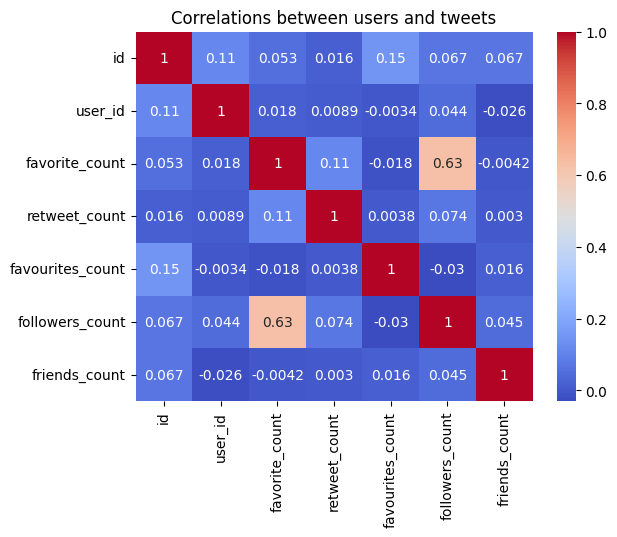

<Figure size 800x600 with 0 Axes>

In [13]:
sns.heatmap(df_tweets_users.corr(), annot=True, cmap='coolwarm')
plt.title('Correlations between users and tweets')
plt.figure(figsize=(8, 6))
plt.show()

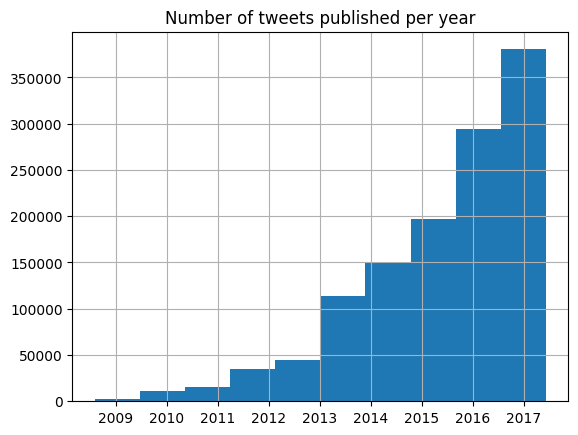

<Figure size 800x600 with 0 Axes>

In [15]:
df_tweets['created_at'].hist()
plt.title('Number of tweets published per year')
plt.figure(figsize=(8, 6))
plt.show()

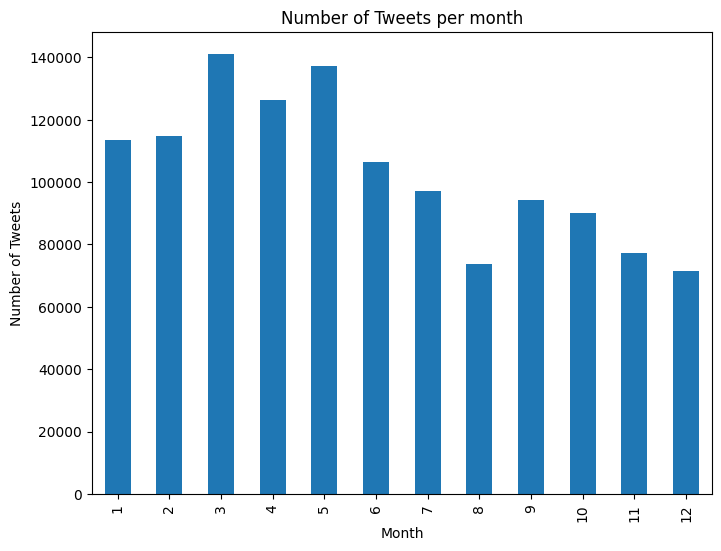

<Figure size 800x600 with 0 Axes>

In [16]:
df_tweets['month'] = df_tweets['created_at'].dt.month
df_tweets['month'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per month')
plt.figure(figsize=(8, 6))
plt.show()

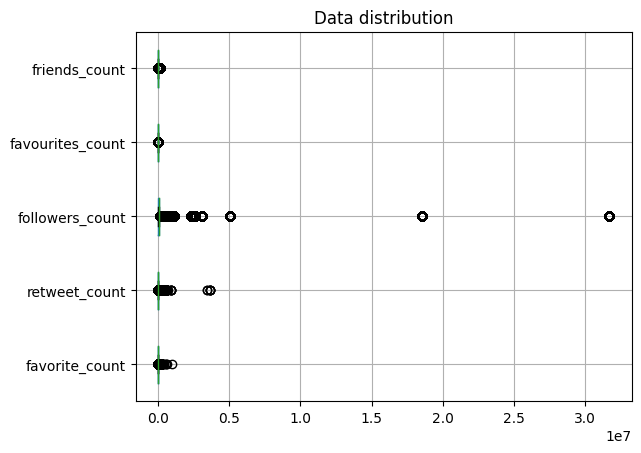

<Figure size 800x600 with 0 Axes>

In [17]:
df_tweets_users.boxplot(column=['favorite_count', 'retweet_count', 'followers_count', 'favourites_count', 'friends_count'],vert=False)
plt.title('Data distribution')
plt.figure(figsize=(8, 6))
plt.show()

## Word frequency analysis

In [18]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

In [19]:
relevant_tweets = df_tweets.copy()
relevant_tweets['text'] = relevant_tweets['text'].apply(lambda x: x.lower())
relevant_tweets['text'] = relevant_tweets['text'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
relevant_tweets['text'] = relevant_tweets['text'].apply(lambda x: [word for word in x if word not in stop_words])
all_words = [word for tweet in relevant_tweets['text'] for word in tweet if len(word) > 3]
freq_dist = FreqDist(all_words)
print(freq_dist.most_common(40))

[('https', 508449), ('http', 406813), ('today', 117379), ('great', 71654), ('house', 47820), ('bill', 47796), ('thanks', 44519), ('thank', 41741), ('work', 36193), ('time', 35450), ('support', 35000), ('help', 33733), ('congress', 33141), ('health', 31684), ('need', 30991), ('watch', 30585), ('must', 30022), ('proud', 29300), ('president', 29078), ('people', 28834), ('jobs', 28782), ('state', 28763), ('live', 26837), ('happy', 26275), ('week', 25722), ('women', 25612), ('americans', 25488), ('join', 25341), ('senate', 24547), ('care', 24515), ('american', 24465), ('morning', 24200), ('good', 24075), ('families', 23347), ('read', 23155), ('obamacare', 22611), ('vote', 22480), ('make', 22176), ('office', 22045), ('students', 21603)]


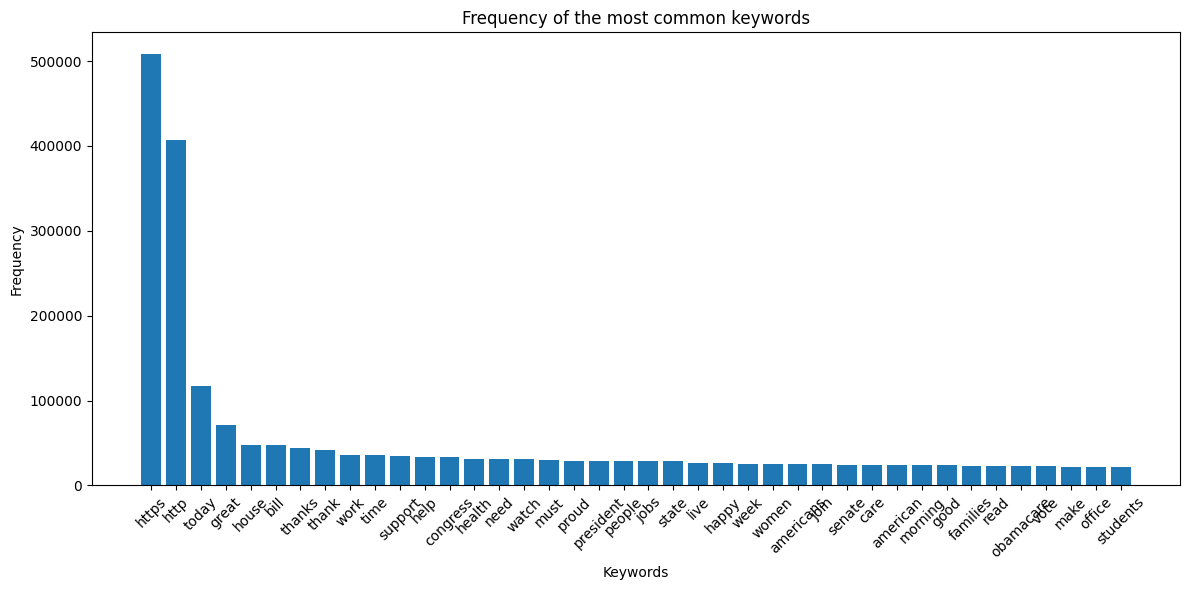

In [23]:
top_words = freq_dist.most_common(40)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of the most common keywords')
plt.tight_layout()
plt.show()

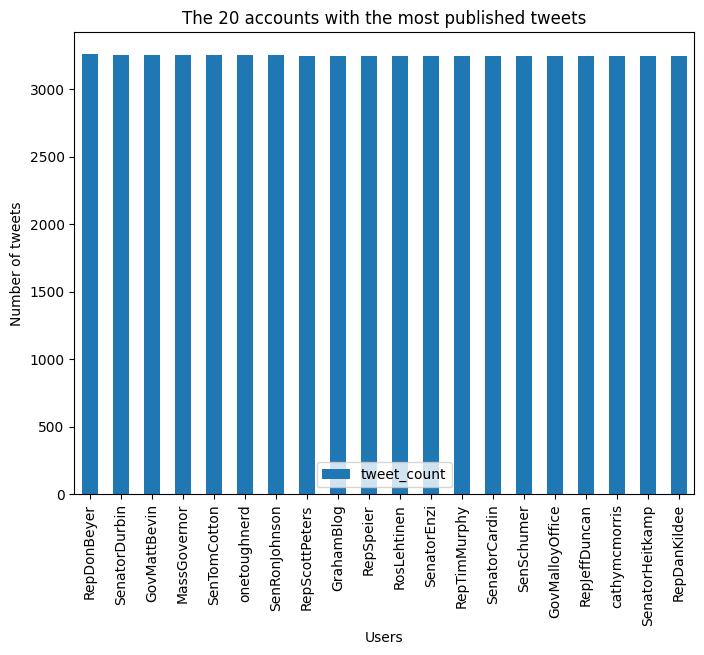

In [42]:
congressists_activity = df_tweets.groupby(['screen_name','user_id']).size().reset_index(name='tweet_count')
congressists_activity = congressists_activity.sort_values('tweet_count',ascending=False)
best_congressists_activity = congressists_activity.head(20)
best_congressists_activity.plot(kind='bar', x='screen_name', y='tweet_count', figsize=(8, 6))
plt.xlabel('Users')
plt.ylabel('Number of tweets')
plt.title('The 20 accounts with the most published tweets')
plt.show()

## Discuss Insights Discovered
Discuss insights discovered (results from your diving deeper / going broader analysis). This is where you put your spin on what you've discovered

In [57]:
pd.set_option('display.max_colwidth', 3)
df_users_desc = df_users[['user_id','name','description', 'favourites_count', 'followers_count', 'friends_count']]
df_users_tweets_desc = pd.merge(congressists_activity, df_users_desc, on='user_id', how='inner')
print('What do the 10 people with the most published tweets do?')
df_users_tweets_desc[['name', 'screen_name','tweet_count','description']].head(10)

What do the 10 people with the most published tweets do?


,name,screen_name,tweet_count,description
0,Rep. Don Beyer,RepDonBeyer,3258,"Representing Virginia's 8th District in Congress. VA8 is NoVa: Arlington, Alexandria, Falls Church, Fairfax. Vice-Ranking @SciCmteDems. #ActOnClimate #EqualPay"
1,Senator Dick Durbin,SenatorDurbin,3252,Serving the people of Illinois. Senate Democratic Whip. Follows/RTs do not equal an endorsement.
2,Governor Matt Bevin,GovMattBevin,3250,Governor of the Commonwealth of Kentucky
3,Charlie Baker,MassGovernor,3250,Official account of Governor Charlie Baker of Massachusetts.
4,Tom Cotton,SenTomCotton,3249,U.S. Senator proudly serving the state of Arkansas.
5,Governor Rick Snyder,onetoughnerd,3249,48th Governor of Michigan. Self-proclaimed nerd. The nation's token-CPA governor. Working hard to reinvent Michigan through Relentless Positive Action.
6,Senator Ron Johnson,SenRonJohnson,3249,Chairman of the Homeland Security and Governmental Affairs Committee & the Subcommittee on Europe & Regional Security Cooperation. Tweets from Ron are signed–rj
7,Rep. Scott Peters,RepScottPeters,3248,"Serving #CA52. @EnergyCommerce, @VetAffairsDems, & @HouseNewDems. Loyalty to Country / Truth & Rule of Law / Opportunity / Strength Abroad / Respect & Kindness"
8,Lindsey Graham,GrahamBlog,3248,Twitter feed for U.S. Senator Lindsey Graham of South Carolina.
9,Jackie Speier,RepSpeier,3246,"Represents California's 14th Congressional District. House Armed Services Committee, House Permanent Select Committee on Intelligence. https://t.co/gGH33BRdP5"


In [118]:
pd.set_option('display.max_colwidth', 3)
df_tweets_text = df_tweets[['id','user_id','screen_name','favorite_count','retweet_count','text']]
df_all_tweets_users = pd.merge(df_tweets_text, df_users_desc, on='user_id', how='left')
df_all_tweets_users = df_all_tweets_users.sort_values('retweet_count',ascending=False)
print('What are the most retweeted tweets?')
df_all_tweets_users[['id', 'screen_name', 'retweet_count', 'text']].head(10)

What are the most retweeted tweets?


,id,screen_name,retweet_count,text
1163458,850789969941495808,GovSandoval,3637896,RT @carterjwm: HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
1166988,852133980367273984,RogerMarshallMD,3637893,RT @carterjwm: HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
1168028,852274372312223744,RepKevinYoder,3637893,RT @carterjwm: HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
1166269,851879159320240128,marcorubio,3637853,RT @carterjwm: HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
1166053,851854116955582464,SenCortezMasto,3637837,RT @carterjwm: HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
1174626,854562618928799744,RepKihuen,3637828,RT @carterjwm: HELP ME PLEASE. A MAN NEEDS HIS NUGGS https://t.co/4SrfHmEMo3
258605,440323150195462144,RepMarkTakano,3447358,RT @TheEllenShow: If only Bradley's arm was longer. Best photo ever. #oscars http://t.co/C9U5NOtGap
258608,440326809285304320,RepAnnieKuster,3447355,RT @TheEllenShow: If only Bradley's arm was longer. Best photo ever. #oscars http://t.co/C9U5NOtGap
1030409,819655046078099456,RepPerlmutter,883078,"RT @POTUS: Thank you for everything. My last ask is the same as my first. I'm asking you to believe—not in my ability to create change, but…"
1026850,819079042083196928,RepCicilline,883078,"RT @POTUS: Thank you for everything. My last ask is the same as my first. I'm asking you to believe—not in my ability to create change, but…"


In [76]:
df_all_tweets_users = df_all_tweets_users.sort_values('favorite_count',ascending=False)
print('What are the tweets that have been marked as favorites the most times?')
df_all_tweets_users[['id', 'screen_name', 'favorite_count', 'text']].head(10)

What are the tweets that have been marked as favorites the most times?


,id,screen_name,favorite_count,text
1042185,822930622926745600,SenSanders,984832,"President Trump, you made a big mistake. By trying to divide us up by race, religion, gender and nationality you actually brought us closer. https://t.co/U7deCCTFx9"
972109,796315640307060736,realDonaldTrump,627475,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before
971077,795954831718498304,realDonaldTrump,569283,TODAY WE MAKE AMERICA GREAT AGAIN!
1093384,835488569850494976,SenSanders,527319,.@realDonaldTrump They did. It wasn't. https://t.co/xqt29RJPEr
1042386,823174199036542976,realDonaldTrump,392346,"Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views."
1013763,815185071317676032,realDonaldTrump,347262,"Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!"
1140896,845363015222542336,SenatorMenendez,315624,"Hey Republicans, don't worry, that burn is covered under the Affordable Care Act"
1041536,822669114237943808,realDonaldTrump,291081,"THANK YOU for another wonderful evening in Washington, D.C. TOGETHER, we will MAKE AMERICA GREAT AGAIN🇺🇸 https://t.co/V3aoj9RUh4"
814402,741007091947556864,realDonaldTrump,289727,"How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted? https://t.co/gECLNtQizQ"
1040012,822421390125043712,realDonaldTrump,269437,It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!


In [119]:
df_users_tweets_desc = df_users_tweets_desc.sort_values('followers_count',ascending=False)
print('Who are the people with the most followers on twitter?')
df_users_tweets_desc[['screen_name','name','followers_count']].head(10)

Who are the people with the most followers on twitter?


,screen_name,name,followers_count
56,realDonaldTrump,Donald J. Trump,31712585
477,POTUS,President Trump,18545354
30,SenSanders,Bernie Sanders,5072538
111,CoryBooker,Cory Booker,3094413
166,marcorubio,Marco Rubio,2554822
341,SenWarren,Elizabeth Warren,2412087
175,SenJohnMcCain,John McCain,2274034
50,NancyPelosi,Nancy Pelosi,1126205
332,JerryBrownGov,Jerry Brown,1119275
55,SenTedCruz,Senator Ted Cruz,960413


In [120]:
df_text=df_tweets_text[['screen_name','retweet_count']]
df_text_by_users = df_text.groupby(['screen_name'])['retweet_count'].sum().reset_index()
df_text_by_users = df_text_by_users.sort_values('retweet_count',ascending=False)
print('People with the most retweets')
df_text_by_users.head()

People with the most retweets


,screen_name,retweet_count
521,realDonaldTrump,40852446
432,SenSanders,13332027
109,POTUS,5855933
515,marcorubio,4964220
261,RepKihuen,4896176


## Linear regression

In [84]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [106]:
df_all_tweets_users = df_all_tweets_users.dropna(subset=['followers_count'])
df_all_tweets_users['favourites_count'] = df_all_tweets_users['favourites_count'].astype('int64')
df_all_tweets_users['followers_count'] = df_all_tweets_users['followers_count'].astype('int64')
df_all_tweets_users['friends_count'] = df_all_tweets_users['friends_count'].astype('int64')

X = df_all_tweets_users[['followers_count']]
Y = df_all_tweets_users['favorite_count']

regresion_lineal = LinearRegression()
regresion_lineal.fit(X, Y)

LinearRegression()

In [107]:
intercepto = regresion_lineal.intercept_
pendiente = regresion_lineal.coef_
print("intercept:", intercepto)
print("coef:", pendiente)

intercept: -39.60696610656416
coef: [0.00130326]


C:\Users\ekaro\.conda\envs\env_anaconda_2023\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


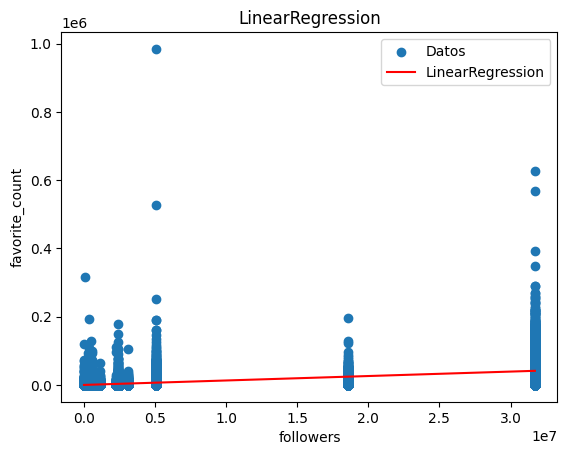

In [113]:
x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = regresion_lineal.predict(x_vals.reshape(-1, 1))

# Graficar los datos y la línea de regresión
plt.scatter(X, Y, label='Datos')
plt.plot(x_vals, y_vals, color='red', label='LinearRegression')
plt.xlabel('followers')
plt.ylabel('favorite_count')
plt.title('LinearRegression')
plt.legend()
plt.show()

In [111]:
print('If I had 3,000,000 followers, how many times would one of my tweets be favorited?')
print(regresion_lineal.predict([[3000000]]))

If I had 3,000,000 followers, how many times would one of my tweets be favorited?
[3870.16558]


C:\Users\ekaro\.conda\envs\env_anaconda_2023\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Frequency of words in the 1000 most retweeted tweets

In [123]:
df_all_tweets_user_ordered_retweet_count = df_all_tweets_users.sort_values('retweet_count',ascending=False).head(1000)
df_all_tweets_user_ordered_retweet_count['text'] = df_all_tweets_user_ordered_retweet_count['text'].astype('str')
df_all_tweets_user_ordered_retweet_count['text'] = df_all_tweets_user_ordered_retweet_count['text'].apply(lambda x: x.lower())
df_all_tweets_user_ordered_retweet_count['text'] = df_all_tweets_user_ordered_retweet_count['text'].apply(word_tokenize)

In [124]:
stop_words = set(stopwords.words('english'))
df_all_tweets_user_ordered_retweet_count['text'] = df_all_tweets_user_ordered_retweet_count['text'].apply(lambda x: [word for word in x if word not in stop_words])

In [125]:
all_words = [word for tweet in df_all_tweets_user_ordered_retweet_count['text'] for word in tweet if len(word)>3]
freq_dist = FreqDist(all_words)

In [127]:
print('Most common words in the most retweeted tweets')
print(freq_dist.most_common(30))

Most common words in the most retweeted tweets
[('https', 225), ('realdonaldtrump', 131), ('potus', 106), ('people', 101), ('today', 98), ('honor', 85), ('trump', 79), ('right', 74), ('vote', 73), ('repjohnlewis', 72), ('american', 68), ('president', 67), ('beaten', 64), ('like', 63), ('the…', 62), ('arrested', 60), ('letter', 59), ('lives', 58), ('believe', 56), ('friends', 54), ('never', 53), ('america', 53), ('must', 52), ('back', 51), ('marched', 51), ('gave', 51), ('protested', 50), ('mine', 50), ('country', 45), ('great', 44)]


## Discuss your hypotheses and any direct outcomes from whether you were right or wrong. Did you change your hypotheses? Or create new ones?
My initial hypotheses were as follows:

"The most mentioned topics in congressional tweets during the 2008-2017 period are mainly related to the economy, healthcare, and national security." This hypothesis was partly rejected. After applying a word frequency analysis to the tweets, the most common topics turned out to be political, related to Congress and the White House, as well as healthcare topics.

"The most active members of Congress on Twitter during the 2008-2017 period are those who hold leadership positions on key committees and have high political profiles." This hypothesis was confirmed, as the most active accounts belonged to RepDonBeyer, SenatorDurbin, GovMattBevin, MassGovernor, SenRonJohnson, among others. All of them are individuals with a high political level in the United States.

"The congressional tweets that generated the most engagement and retweets during the 2008-2017 period are those that addressed contentious and controversial issues, and are posted by legislators with a large social media following." This hypothesis is partially true, as among my results, the user marcorubio is one of the most followed accounts in the entire dataset. However, the tweets that obtained the most retweets were from users with high political power but a regular number of followers, such as GovSandoval, RogerMarshallMD, RepKevinYoder, and RepKihuen

## Discuss any metrics you created and why?
After implementing a predictive model of Linear Regression using machine learning, it allows predicting how many times a tweet will be marked as a favorite. I implemented this model after discovering a strong correlation between the number of followers and the frequency of being marked as a favorite. I also used word frequency analysis, which helped me identify the most discussed topics in tweets and the most retweeted topics.

## Discuss discoveries about relationships in the data / themes discovered.
In my analysis, I discovered several interesting things such as the characteristics and correlations of the tweets, the number of tweets published by year and month, the data distribution, the most common topics in tweets, and the most common topics in retweeted tweets. I also identified the users with the highest number of tweets on Twitter, the most retweeted tweets, the most favorited tweets, the users with the most followers, and users with the most retweets.

The number of followers depends on the user's political level, and the majority of retweets and tweet publications occurred in 2017, during the presidential elections in the United States. Political and health topics are the most discussed on Twitter. The number of followers contributes to the number of favorites a tweet receives, and not always the most active users are the most famous or have many followers.

## Recommendations and Actions

### Summarize the insights you found and make recommendations on what your client should do. What is the next steps or the action that should be taken as a result of your analysis?
In summary, the analysis revealed that the number of followers is influenced by the user's political level. The peak activity in terms of retweets and tweet publications was observed in 2017, coinciding with the US presidential elections. Political and health topics dominate the discussions on Twitter. Additionally, the number of followers plays a role in determining the number of favorites a tweet receives. It was also found that being the most active user does not necessarily correlate with being the most famous or having a large number of followers.
Now it is necessary to make a report of the discoveries and inform the client company about the discoveries.